In [0]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms 
import torch.nn.init

In [0]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [0]:
# parameters 
lr = 0.001
training_epochs = 15
batch_size = 100

In [0]:
# load data
mnist_train = dsets.MNIST('MNIST_data/', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST('MNIST_data/', train=False, transform=transforms.ToTensor(), download=True)

In [0]:
#data_loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)

In [0]:
# CNN module
class CNN(torch.nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    #Layer1 image shape(?, 28, 28, 1)
    #       conv       (?, 28, 28, 32)
    #       pooling    (?, 14, 14, 32)
    self.layer1 = torch.nn.Sequential(torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
                                     torch.nn.ReLU(),
                                     torch.nn.MaxPool2d(kernel_size=2, stride=2))
    #Layer2 image shape(?, 14, 14, 32)
    #       conv       (?, 14, 14, 64)
    #       pooling    (?, 7, 7, 64)
    self.layer2 = torch.nn.Sequential(torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
                                     torch.nn.ReLU(),
                                     torch.nn.MaxPool2d(kernel_size=2, stride=2))
    # Fianal linear layer 7*7*64 => 10
    self.fc = torch.nn.Linear(7*7*64, 10, bias=True)
    
    torch.nn.init.xavier_uniform_(self.fc.weight)
    
  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.view(out.size(0), -1) # Flatten for FC
    out = self.fc(out)
    return out

In [0]:
model = CNN().to(device)

In [0]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [0]:
hist_epoch = []
hist_cost = []

In [16]:
total_batch = len(data_loader)
print('Learning started, It will take sometime.')

for epoch in range(training_epochs):
  avg_cost = 0
  
  for X, Y in data_loader:
    # The training image is already size of 28x28, you need no reshape
    X = X.to(device)
    Y = Y.to(device)
    
    optimizer.zero_grad()
    hypo = model(X)
    cost = criterion(hypo, Y)
    cost.backward()
    optimizer.step()
    
    avg_cost += cost/total_batch
  
  hist_epoch.append(epoch+1)
  hist_cost.append(avg_cost)
  
  print('Epoch {}| Cost : {:>.9f}'.format(epoch+1, avg_cost))

Learning started, It will take sometime.
Epoch 1| Cost : 0.214126334
Epoch 2| Cost : 0.060437035
Epoch 3| Cost : 0.043911736
Epoch 4| Cost : 0.035087559
Epoch 5| Cost : 0.029004838
Epoch 6| Cost : 0.023899682
Epoch 7| Cost : 0.021205351
Epoch 8| Cost : 0.016518120
Epoch 9| Cost : 0.015489823
Epoch 10| Cost : 0.011317795
Epoch 11| Cost : 0.010156947
Epoch 12| Cost : 0.008395698
Epoch 13| Cost : 0.008079440
Epoch 14| Cost : 0.006420476
Epoch 15| Cost : 0.005312384


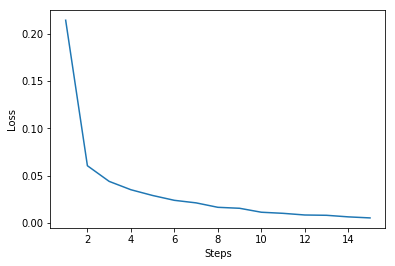

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(hist_epoch, hist_cost)
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.show()

In [19]:
# Accuracy check 
with torch.no_grad():
  X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)
  
  predict = model(X_test)
  correct_prediction = torch.argmax(predict, 1) == Y_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy: ', accuracy.item())

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy:  0.9810000061988831
